# **Micro_Fossil_DataScience**
Fossil Data Viewing and Analysis

Load the data

Display each slice in every direction

Show a 3D isosurface plot

In [55]:
!pip install graphviz==0.9
!pip install pydot
!pip install seaborn==0.9.0
!conda install scikit-image

Solving environment: ...working... done

# All requested packages already installed.



In [56]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.cm as cm 
import seaborn as sns 
import statsmodels.api as sm 
import statsmodels.formula.api as smf
from skimage.io import imread
import matplotlib.pyplot as plt
from skimage.util import montage as montage2d

In [57]:
fossil_path = "Gut-PhilElvCropped.tif"
fossil_data = imread(fossil_path)
print('Loading Fossil Data sized {}'.format(fossil_data.shape))

Loading Fossil Data sized (250, 296, 349)


Text(0.5, 1.0, 'Slice Histogram')

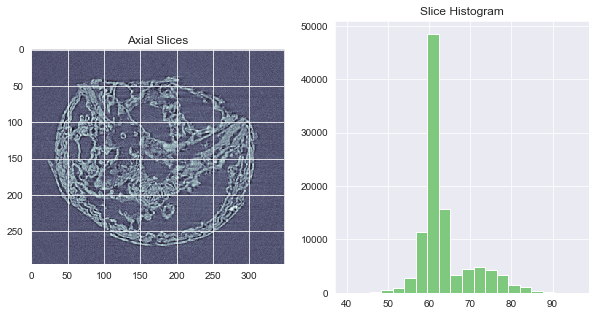

In [58]:
%matplotlib inline
slice_idx = int(fossil_data.shape[0]/2)
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10, 5))

ax1.imshow(fossil_data[slice_idx], cmap = 'bone')
ax1.set_title('Axial Slices')
_ = ax2.hist(fossil_data[slice_idx].ravel(), 20)
ax2.set_title('Slice Histogram')

In [59]:
from PIL import Image
import numpy 

im = Image.open('Gut-PhilElvCropped.tif') 
imarray = numpy.array(im) 
imarray.shape 
im.show()

# **Filtro**

Aqui usamos um filtro simples para limpar os dados

Text(0.5, 1.0, 'Filtrado')

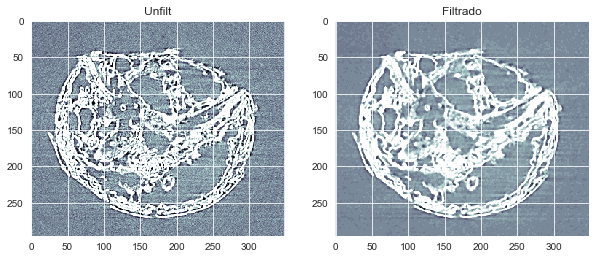

In [92]:
%matplotlib inline
from scipy.ndimage.filters import median_filter
# filter the data
filter_fossil_data = median_filter(fossil_data, (3,3,3))

# setup the plot
slice_idx = int(fossil_data.shape[0]/2)
test_slice = fossil_data[slice_idx]
test_filt_slice = filter_fossil_data[slice_idx]
# setup the default image arguments
im_args = dict(cmap = 'bone', vmin = 50, vmax = 70)

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10, 5))
ax1.imshow(test_slice, **im_args)
ax1.set_title('Unfilt')
_ = ax2.imshow(test_filt_slice, **im_args)
ax2.set_title('Filtrado')

# **Showing Various Slices**
Visualização de diferentes seções do microfossil

Limitação dos dados

(-0.5, 2367.5, 1999.5, -0.5)

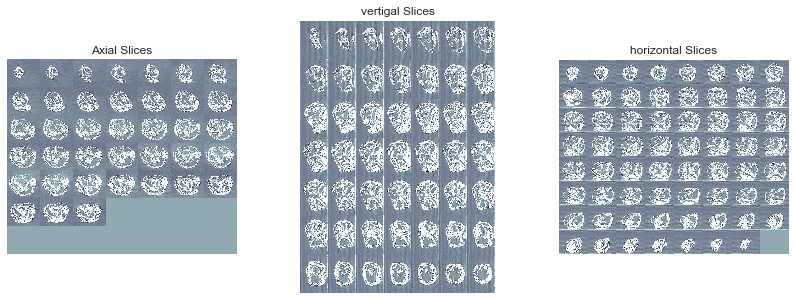

In [90]:
%matplotlib inline
skip_border = 50
skip_middle = 4
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (14, 5))
ax1.imshow(montage2d(filter_fossil_data[skip_border:-skip_border:skip_middle]),**im_args)
ax1.set_title('Axial Slices')
ax1.axis('off')

ax2.imshow(montage2d(filter_fossil_data.transpose(1,2,0)[skip_border:-skip_border:skip_middle]), **im_args)
ax2.set_title('vertigal Slices')
ax2.axis('off')

ax3.imshow(montage2d(filter_fossil_data.transpose(2,0,1)[skip_border:-skip_border:skip_middle]), **im_args)
ax3.set_title('horizontal Slices')
ax3.axis('off')

Text(0.5, 1.0, 'axial')

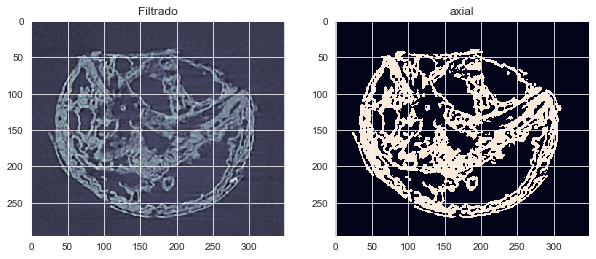

In [91]:
%matplotlib inline
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10, 5))
thresh_fossil_data = filter_fossil_data > 65
thresh_slice = thresh_fossil_data[slice_idx]
ax1.imshow(test_filt_slice, cmap = 'bone')
ax1.set_title('Filtrado')
_ = ax2.imshow(thresh_slice)
ax2.set_title('axial')

## **Morfologia do corpo**
Modelo 3d do corpo fóssil

Text(0.5, 1.0, 'Slice After Closing')

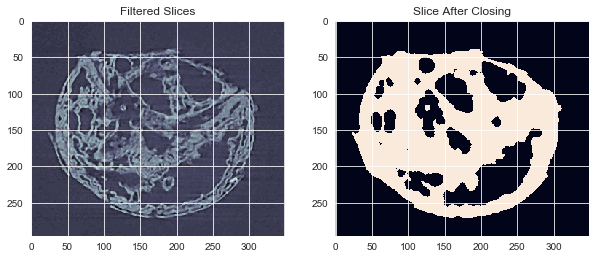

In [63]:
%matplotlib inline
from skimage.morphology import binary_closing, ball
closed_fossil_data = binary_closing(thresh_fossil_data, ball(5))
close_slice = closed_fossil_data[slice_idx]
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10, 5))

ax1.imshow(test_filt_slice, cmap = 'bone')
ax1.set_title('Filtered Slices')
_ = ax2.imshow(close_slice)
ax2.set_title('Slice After Closing')

In [64]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from skimage import measure
def show_3d_mesh(p, threshold):
    verts, faces, _, _ = measure.marching_cubes_lewiner(p, threshold)

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    mesh = Poly3DCollection(verts[faces], alpha=0.9, edgecolor='none', linewidth = 0.1)
    mesh.set_facecolor([.1, 1, .1])
    mesh.set_edgecolor([1, 0, 0])
    
    ax.add_collection3d(mesh)

    ax.set_xlim(0, p.shape[0])
    ax.set_ylim(0, p.shape[1])
    ax.set_zlim(0, p.shape[2])
    
    ax.view_init(45, 45)
    return fig

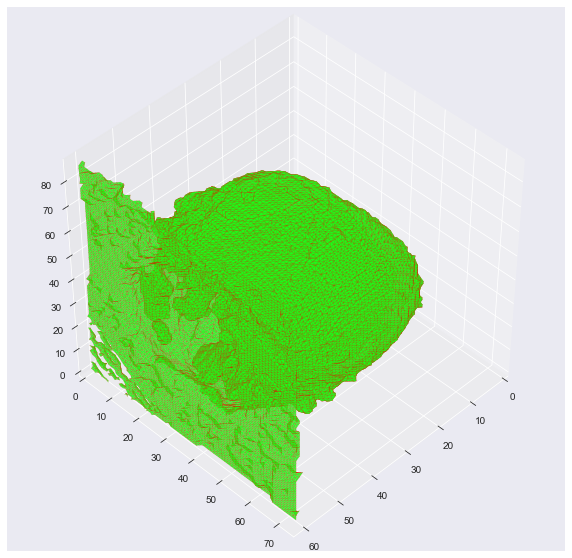

In [65]:
from scipy.ndimage import zoom

fossil_downscale = zoom(closed_fossil_data.astype(np.float32), 0.25)
_ = show_3d_mesh(fossil_downscale, 0.5)

# Estatistica
Modelos estatisticos, graficos e data science de dados .csv

In [66]:
dados = pd.read_csv('dados.csv', sep=';')
dados.shape

(20, 10)

In [67]:
dados.head()

,Unnamed: 0,x,y,z,w,media,max,conta,desvpad,freq
0,a,1,56,12,2,"17,75",56,6,"24,24030243",0
1,b,2,2,2,2,2,2,6,"1,511857892",0
2,c,2,1,3,2,2,3,6,"1,603567451",0
3,d,5,8,45,2,15,45,6,"18,86796226",0
4,e,4,9,5,2,5,9,6,"2,563479778",0


In [68]:
#boxspot

# palette -> Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r
sns.set_palette("Accent")

# style -> white, dark, whitegrid, darkgrid, ticks
sns.set_style("darkgrid")

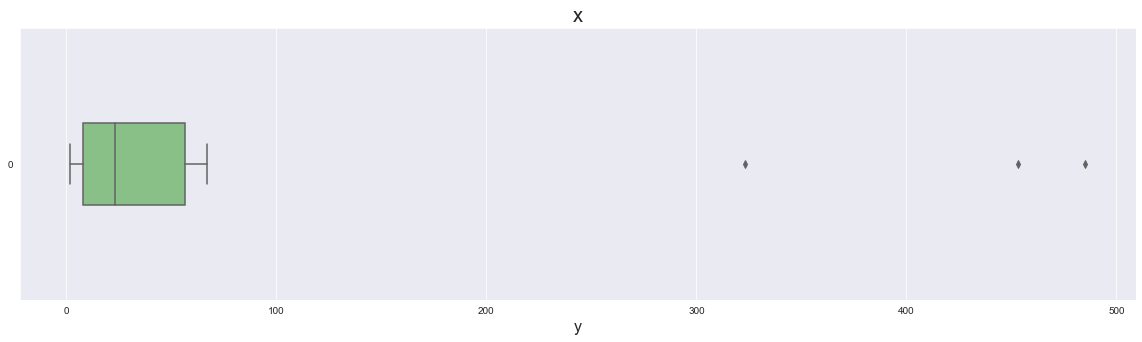

In [69]:
ax = sns.boxplot(data=dados['max'], orient='h', width=0.3)
ax.figure.set_size_inches(20, 5)
ax.set_title('x', fontsize=20)
ax.set_xlabel('y', fontsize=16)
ax

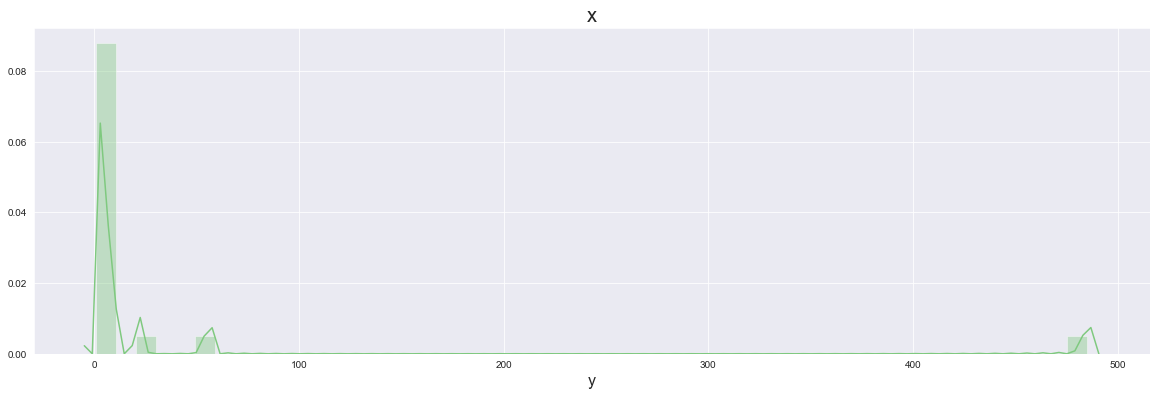

In [70]:
# distribuição de frequência

ax = sns.distplot(dados['y'])
ax.figure.set_size_inches(20, 6)
ax.set_title('x', fontsize=20)
ax.set_xlabel('y', fontsize=16)
ax

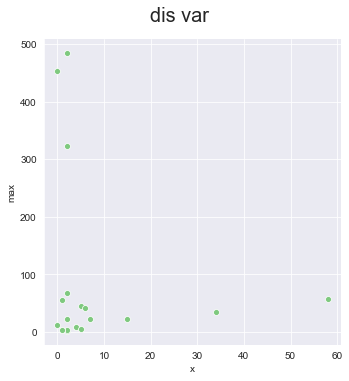

In [71]:
# dispersão entre as variaveis

ax = sns.pairplot(dados, y_vars='max', x_vars='x', height=5)
ax.fig.suptitle('dis var', fontsize=20, y=1.05)
ax

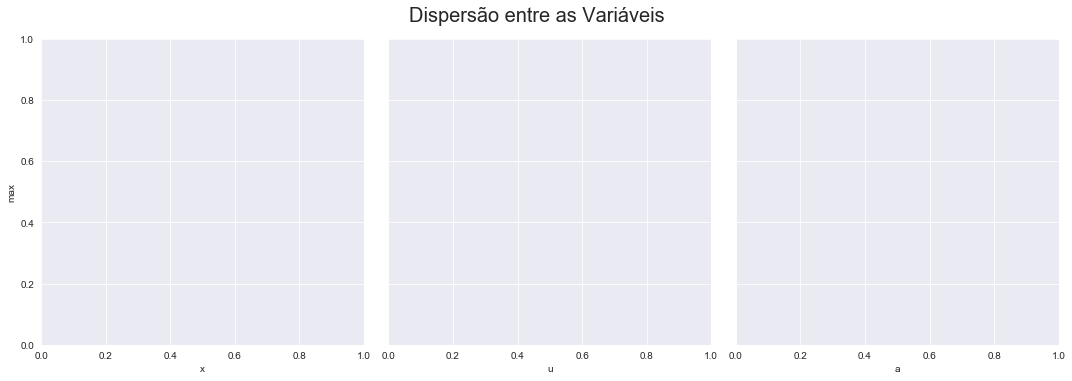

In [72]:
ax = sns.pairplot(dados, y_vars='max', x_vars=['x', 'u', 'a'], kind='y', height=5)
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

In [73]:
# transformando os dados, distribuição normal

np.log(1)

0.0

In [74]:
dados['log_v'] = np.log(dados['max'])
dados['log_x'] = np.log(dados['x'])
dados['log_y'] = np.log(dados['y'] + 1)
dados['log_z'] = np.log(dados['z'] + 1)
dados.head()

C:\Users\Thubaralei\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


,Unnamed: 0,x,y,z,w,media,max,conta,desvpad,freq,log_v,log_x,log_y,log_z
0,a,1,56,12,2,"17,75",56,6,"24,24030243",0,4.025352,0.000000,4.043051,2.564949
1,b,2,2,2,2,2,2,6,"1,511857892",0,0.693147,0.693147,1.098612,1.098612
2,c,2,1,3,2,2,3,6,"1,603567451",0,1.098612,0.693147,0.693147,1.386294
3,d,5,8,45,2,15,45,6,"18,86796226",0,3.806662,1.609438,2.197225,3.828641
4,e,4,9,5,2,5,9,6,"2,563479778",0,2.197225,1.386294,2.302585,1.791759


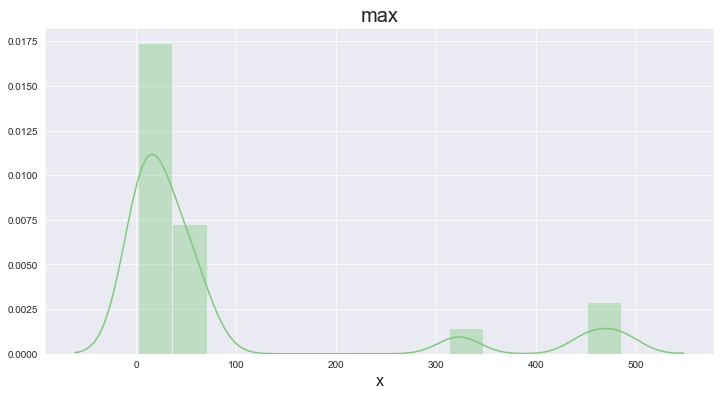

In [75]:
# DF var dependente (Y)

ax = sns.distplot(dados['max'])
ax.figure.set_size_inches(12, 6)
ax.set_title('max', fontsize=20)
ax.set_xlabel('x', fontsize=16)
ax

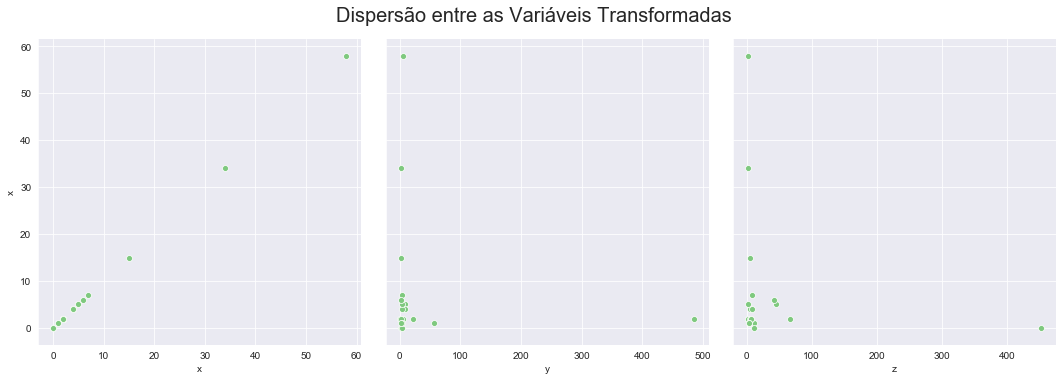

In [76]:
# dispersão entre variaveis

ax = sns.pairplot(dados, y_vars='x', x_vars=['x', 'y', 'z'], height=5)
ax.fig.suptitle('Dispersão entre as Variáveis Transformadas', fontsize=20, y=1.05)
ax

# Dataset e Mecanismo de treino 

In [77]:
from sklearn.model_selection import train_test_split


In [78]:
y = dados['x']

In [79]:
X = dados[['x', 'y', 'z']]

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2811)

In [81]:
#regressão linear

X_train_com_constante = sm.add_constant(X_train)
X_train_com_constante
modelo_statsmodels = sm.OLS(y_train, X_train_com_constante, hasconst = True).fit()

C:\Users\Thubaralei\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [82]:
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:                      x   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.165e+29
Date:                Sun, 20 Oct 2019   Prob (F-statistic):          1.20e-173
Time:                        22:48:48   Log-Likelihood:                 475.92
No. Observations:                  16   AIC:                            -943.8
Df Residuals:                      12   BIC:                            -940.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.773e-15   1.14e-14      0.504      0.6

C:\Users\Thubaralei\Anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


In [83]:
# modelo avaliado variaveis explicativas e estimativa de modelo

X = dados[['max', 'x']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2811)
X_train_com_constante = sm.add_constant(X_train)
modelo_statsmodels = sm.OLS(y_train, X_train_com_constante, hasconst = True).fit()

In [84]:
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:                      x   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.993e+30
Date:                Sun, 20 Oct 2019   Prob (F-statistic):          1.55e-193
Time:                        22:48:48   Log-Likelihood:                 490.00
No. Observations:                  16   AIC:                            -974.0
Df Residuals:                      13   BIC:                            -971.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.553e-15    4.7e-15      0.756      0.4

In [85]:
# estimando modelos 

from sklearn.linear_model import LinearRegression
from sklearn import metrics

modelo = LinearRegression()
modelo.fit(X_train, y_train)
print('R² = {}'.format(modelo.score(X_train, y_train).round(3)))
y_previsto = modelo.predict(X_test)
print('R² = %s' % metrics.r2_score(y_test, y_previsto).round(3))

R² = 1.0
R² = 1.0


In [86]:
# previsões pontuais

entrada = X_test[0:1]
entrada

,max,x
3,45,5


In [87]:
modelo.predict(entrada)[0]

5.0

In [88]:
np.exp(modelo.predict(entrada)[0])

148.4131591025766

In [89]:
# Simulados simples

Variavel x = 0
Variavel y = 1
entrada = [[np.log(x), np.log(z + 1)]]

print('get {0:.2f}'.format(np.exp(modelo.predict(entrada)[0])))

SyntaxError: invalid syntax (<ipython-input-89-a0956b994e04>, line 3)

In [93]:
# interpretação do modelo

modelo.intercept_
np.exp(modelo.intercept_)
modelo.coef_
X.columns
index = ['var x', 'log x', 'log z']

In [94]:
pd.DataFrame(data=np.append(modelo.intercept_, modelo.coef_), index=index, columns=['Parâmetros'])

,Parâmetros
var x,0.000000e+00
log x,-4.154653e-18
log z,1.000000e+00


# Analise grafica final

In [95]:
y_previsto_train = modelo.predict(X_train)

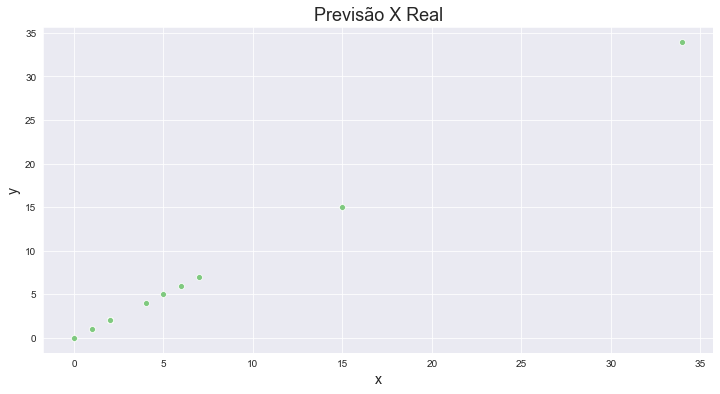

In [96]:
ax = sns.scatterplot(x=y_previsto_train, y=y_train)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão X Real', fontsize=18)
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)
ax

In [97]:
residuo = y_train - y_previsto_train

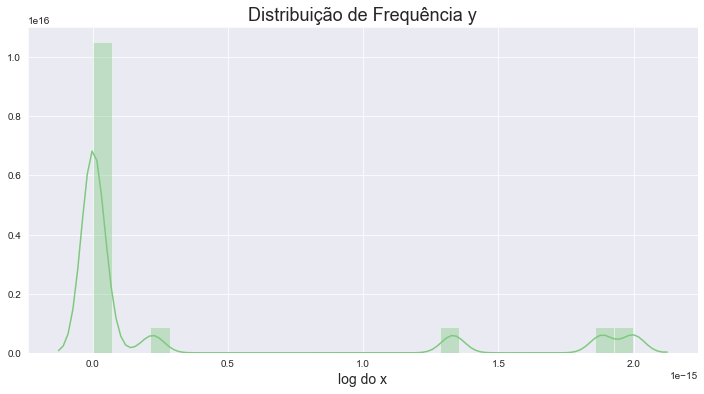

In [98]:
ax = sns.distplot(residuo)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequência y', fontsize=18)
ax.set_xlabel('log do x', fontsize=14)
ax